# Visualize the results of mapping a mixed RNA-seq sample against bacteria and phage. 

1. What fraction/percent of the sample mapped to each reference genome?
2. What locations of the phage reference genomes had the greatest read coverage?

In [1]:
library(readr)
library(dplyr, warn.conflicts = F)
library(ggplot2)
library(ggtext)

In [2]:
setwd("..")

In [3]:
# use Arcadia brand font if present
if(file.exists("inputs/SuisseIntl-Regular.otf")){
  library(showtext)
  font_add("SuisseIntl", 
           regular = "inputs/SuisseIntl-Regular.otf",
           bold = "inputs/SuisseIntl-Bold.otf", 
           italic = "inputs/SuisseIntl-RegularItalic.otf")
  showtext::showtext_auto()
  theme_arcadia <- theme_classic() +
    theme(text = element_text(family = "SuisseIntl"))
} else {
  theme_arcadia <- theme_classic()
}

Loading required package: sysfonts

Loading required package: showtextdb



In [4]:
reference_df <- data.frame(reference = c("NC_000964.3", "NZ_CP014269.1", "NC_000866.4", "NC_011421.1"),
                           name = c("*Bacillus subtilis* strain 168", "*Escherichia coli* strain B", "Phage T4", "Phage SPO1"), 
                           class = c("Bacteria", "Bacteria", "Phage", "Phage"))

In [5]:
idxstats <- read_tsv("outputs/bwa_align/J1.idxstats", col_names = c("reference", "length", "num_mapped", "num_unmapped"), show_col_types = F) %>%
  left_join(reference_df, by = "reference") %>%
  mutate(total_reads = sum(num_mapped, num_unmapped),
         percent_mapped = (num_mapped/total_reads)*100)

Warning message in do_once((if (is_R_CMD_check()) stop else warning)("The function xfun::isFALSE() will be deprecated in the future. Please ", :
“The function xfun::isFALSE() will be deprecated in the future. Please consider using base::isFALSE(x) or identical(x, FALSE) instead.”


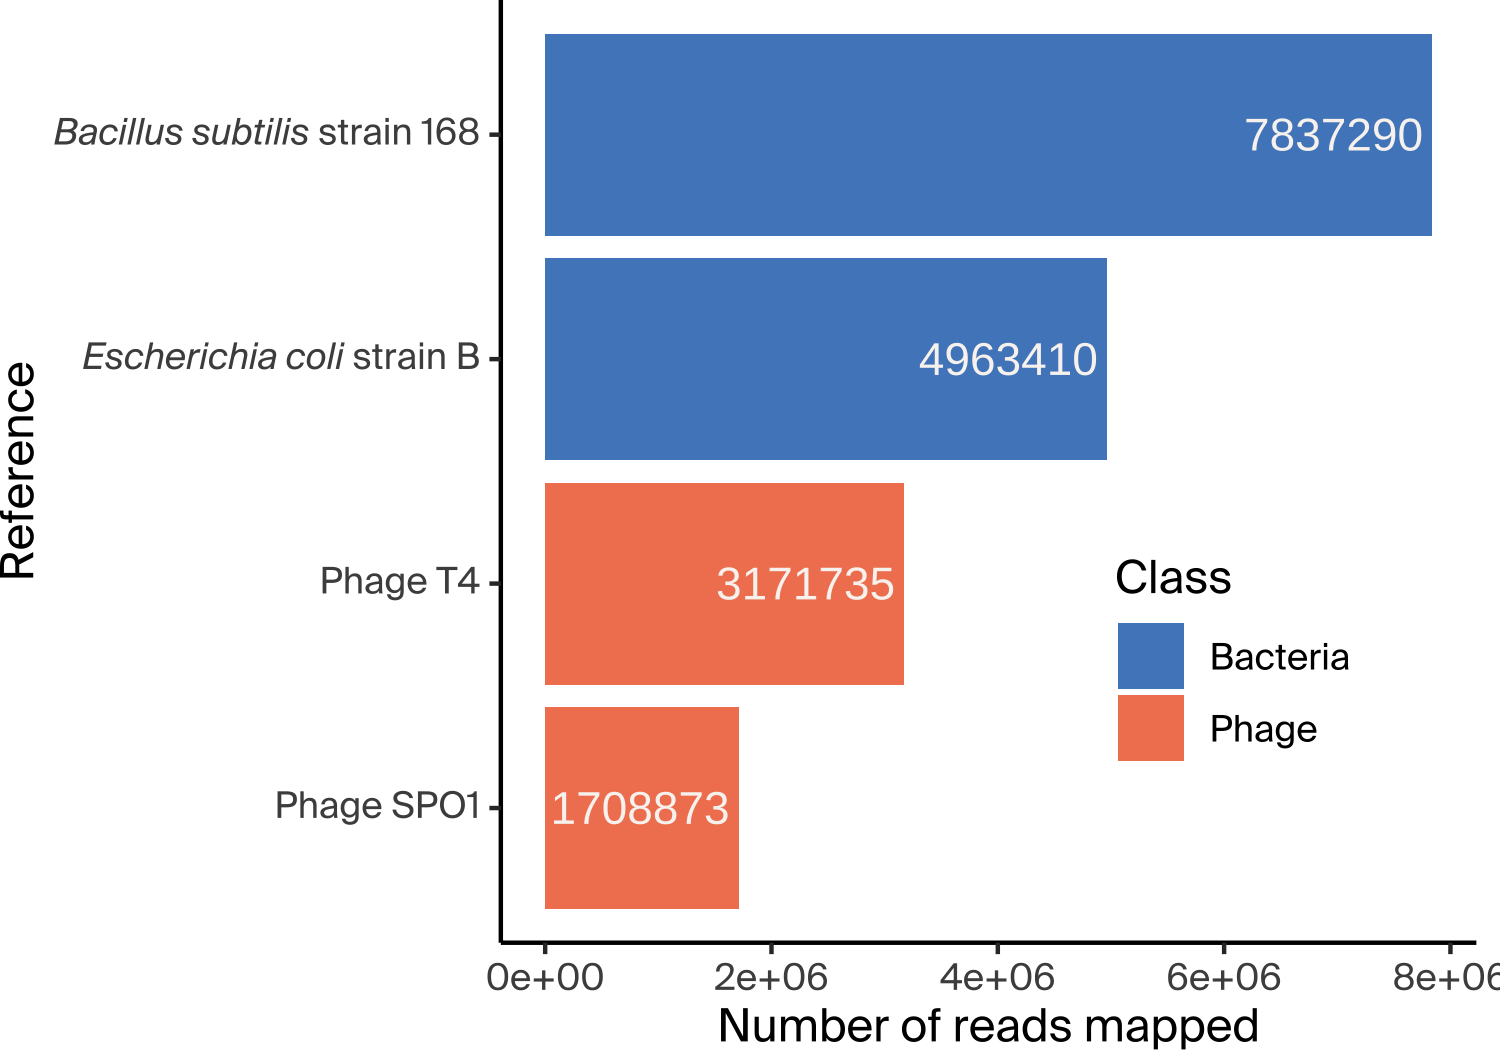

In [6]:
options(repr.plot.width = 5, repr.plot.height = 3.5, repr.plot.res = 300)

# number of reads mapped
ggplot(idxstats %>% filter(!is.na(name)), 
      aes(x = reorder(name, num_mapped), y = num_mapped, fill = class)) +
  geom_col() +
  geom_text(aes(label = num_mapped), hjust = 1.05, colour = "#F8F4F1") +
  theme_arcadia +
  coord_flip() +
  labs(y = "Number of reads mapped", fill = "Class", x = "Reference") +
  scale_fill_manual(values = c("#5088C5", "#F28360"),
                    labels = c("Bacteria", "Phage")) +
  theme(axis.text.y = ggtext::element_markdown(),
        legend.position = c(0.75, 0.3),
        plot.margin = margin(, .2, , , "cm"))

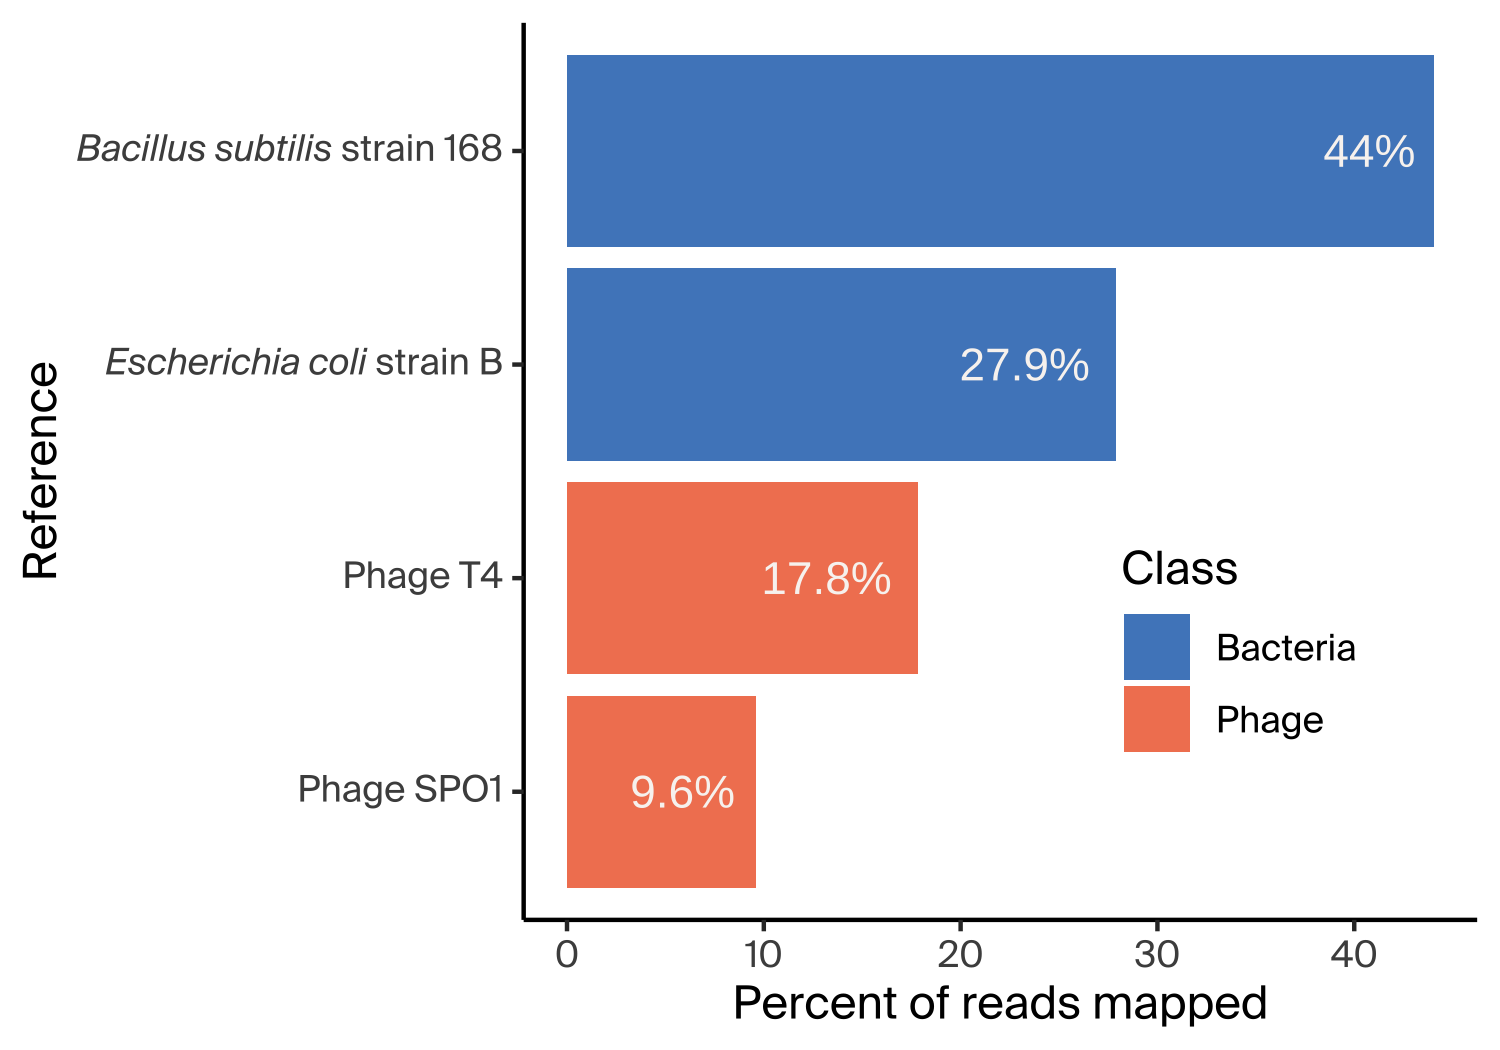

In [7]:
# percent of reads
ggplot(idxstats %>% filter(!is.na(name)), 
       aes(x = reorder(name, percent_mapped), y = percent_mapped, fill = class)) +
  geom_col() +
  geom_text(aes(label = paste0(round(percent_mapped, digits = 1), "%")), hjust = 1.2, colour = "#F8F4F1") +
  theme_arcadia +
  coord_flip() +
  labs(y = "Percent of reads mapped", fill = "Class", x = "Reference") +
  scale_fill_manual(values = c("#5088C5", "#F28360"),
                    labels = c("Bacteria", "Phage")) +
  theme(axis.text.y = ggtext::element_markdown(),
        legend.position = c(0.75, 0.3))

## Depth plots

In [8]:
depth <- read_tsv("outputs/bwa_align/J1.depth", col_names = c("reference", "position", "depth"), show_col_types = F) %>%
  left_join(reference_df, by = "reference") %>%
  filter(class %in% "Phage")

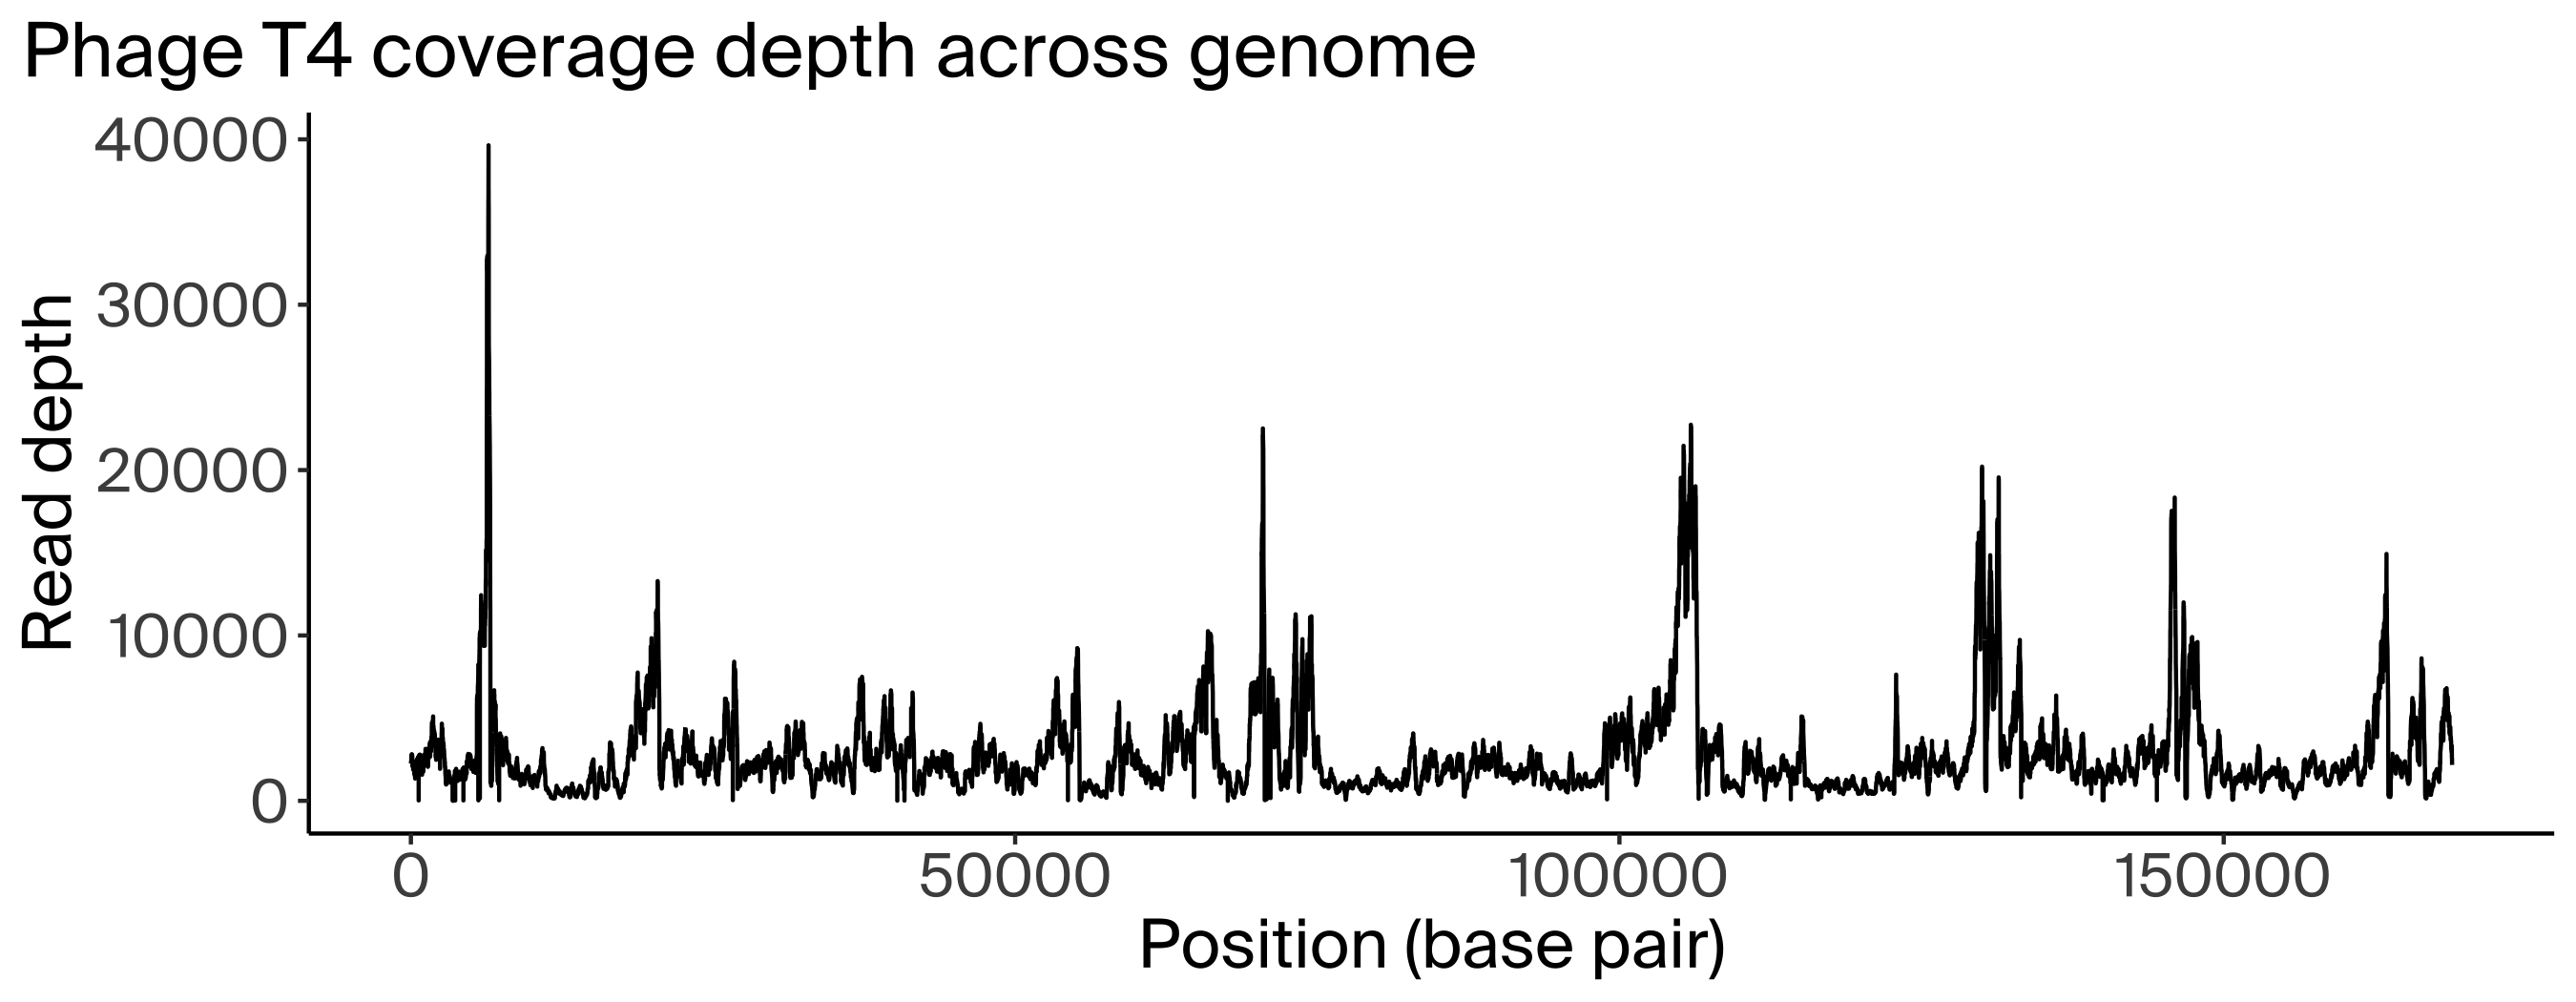

In [9]:
options(repr.plot.width = 9, repr.plot.height = 3.5, repr.plot.res = 300)
ggplot(depth %>% filter(name %in% c("Phage T4")),
       aes(x = position, y = depth)) +
  #geom_point(size = 0.5, alpha = .25) +
  geom_line() +
  theme_arcadia +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "Phage T4 coverage depth across genome",
       x = "Position (base pair)",
       y = "Read depth")

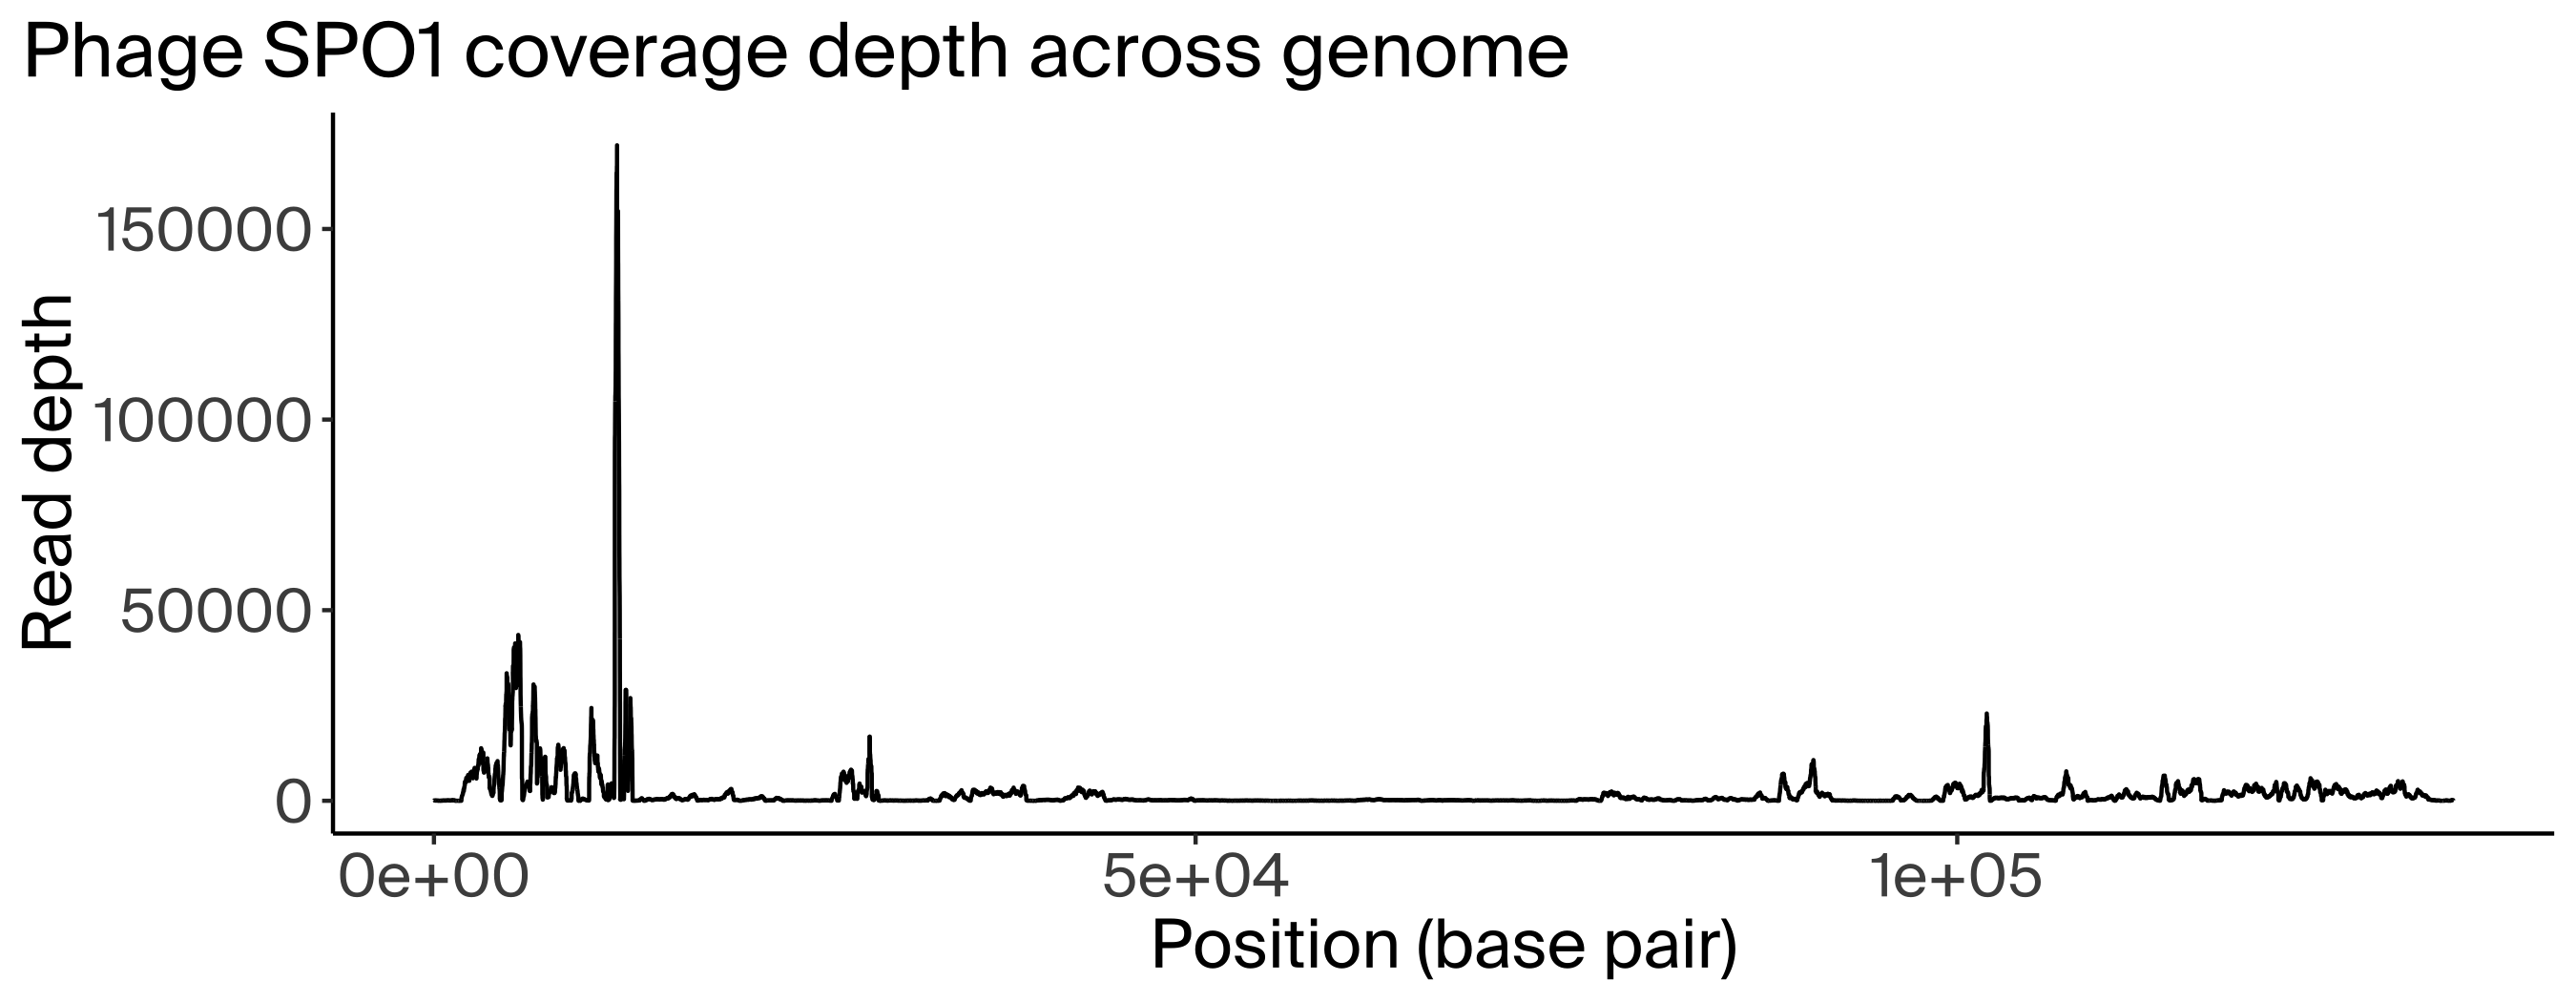

In [10]:
ggplot(depth %>% filter(name %in% c("Phage SPO1")),
       aes(x = position, y = depth)) +
  geom_line() +
  theme_arcadia +
  theme(plot.title.position = "plot",
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 17),
        plot.title = element_text(size = 19)) +
  labs(title = "Phage SPO1 coverage depth across genome",
       x = "Position (base pair)",
       y = "Read depth")

## Software & versions

In [11]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/pltenv/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] showtext_0.9-5 showtextdb_3.0 sysfonts_0.8.8 ggtext_0.1.2   ggplot2_3.4.0 
[6] dplyr_1.1.0    readr_2.1.3   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.10      pillar_1.8.1     compiler_4.1.3   base64enc_0.1-3 
 [5] tools_4.1.3      bit_4.0.5        digest_0.6.31    uuid_1.1-0      
 [9] jsonlite_1.8.4   evaluate_0.20    lifecycle_1.0.3  tibble_3.1.8    
[13] gtable_0.3.1     pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1   
[17] cli_3.6.0        commonmark_1.8.1 parallel_4.1.3   IRkernel_1.3.1  
[21] xfun_0.37        fastmap_1.1.0    stringr_